<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [62]:
#example - you will replace this with the models you are actually using.
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor

## Imports for Splitting Data and Building Pipeline


In [63]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [65]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [66]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [67]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')
#sets the handle (call name) for a data set

### Statistical and Visual Exploration

### Splitting Data into Train/Test

In [68]:
X = df.drop(columns=['forgery'])

In [69]:
y = df['forgery']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=32)

### Building the Pipeline

Determine which attributes are numerical and which are categorical for the pipeline.

In [71]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']
cat_attribs = ['forgery']

Create a column transformer that will MinMax scale the numerical variables.

In [72]:
col_transform = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs)
], remainder='passthrough')

In [73]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                     ])

### Executing the Model

In [74]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

### Evaluating Model

In [75]:
y_pred = pipeline.predict(X_test)

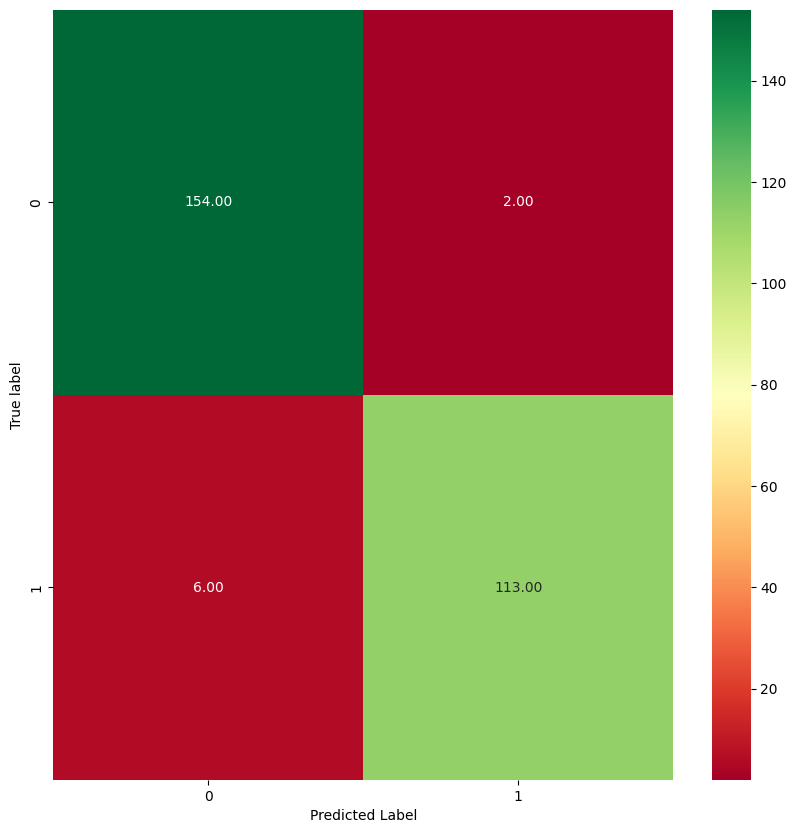

In [76]:
plot_cm(y_test,y_pred)

In [77]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision:  0.9826086956521739
Recall: 0.9495798319327731
F1 Score: 0.9658119658119659


The Precision score, which tells the accuracy of the positive predictions, is very high. When it predicts a banknote is a forgery, it is correct around 98.2% of the time.
The Recall score, which shows what proportion of actual positives was identified correctly, is also very high, at 94.9% This means very few false negatives were identified--i.e., forgeries were labeled as authentic.
The F1 score, which provides a single score balancing both the concerns of precision and recall, was very high as a result of the other two scores being high. This reflects a very strong balance between precision and recall for this model.

### Conclusion
Overall, this confusion matrix shows the model is performing well on the test data, since both the precision and the recall are very high. Only a tiny number (2) of genuine banknotes were identified as forgeries, which would be considered false positives.

## Problem 2

### Reading the Data

In [78]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')
#sets the handle (call name) for a data set

In [79]:
df.rename(columns={
    'Usage_kWh':'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor':'lag_current_pwr',
    'Leading_Current_Power_Factor':'lead_current_pwr',
    'NSM':'nsm',
    'WeekStatus':'week_status',
    'Day_of_week':'day_of_week',
    'Load_Type':'load_type'
    }, inplace=True)

### Splitting Data into Train/Test

In [80]:
X = df.drop(columns=['date', 'usage_kwh'])

In [81]:
y = df['usage_kwh']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=32)

### Building the Pipeline

In [83]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week', 'load_type']

In [84]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),('num', MinMaxScaler(), num_attribs)],
                                  remainder='passthrough')

In [85]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree', DecisionTreeRegressor(max_depth=5))
                     ])

### Executing the Model

In [86]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

### Evaluating Model

In [87]:
y_pred = pipeline.predict(X_test)

In [88]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
print("RMSE train: ", mean_squared_error(y_train, y_train_pred)**(0.5))
print("RMSE test: ", mean_squared_error(y_test, y_pred)**(0.5))

RMSE train:  3.52492558978113
RMSE test:  3.606039408374284


The close consistency between the train and test RMSE values suggests consistency in the model. Since the "usage_kwh" value ranges from 0 to 157, a RMSE value of 3.52 to 3.60 is relatively low in that context and thus suggests strong predictive accuracy.

### Conclusion
This decision tree regression model appears to be a highly suitable fit for predicting kwh usage. The closeness of RMSE train and test values suggest consistency in the model as well as a strong fit between prediction and actual data.